In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
plt.style.use('science')


In [2]:
df = pd.read_csv("data/results_rq2.csv")

In [3]:
bloated_vulnerable_dependencies = df["vulnerable_dependencies_bloated"].sum()
reachable_vulnerable_dependencies  = df["vulnerable_dependencies_reachable"].sum()

active_exposure = df["vulnerable_dependencies_reachable_through_functions"].sum()
inactive_exposures= df["vulnerable_dependencies_bloated_through_functions"].sum()
undefined_exposures= df["vulnerable_dependencies_unresolved_through_functions"].sum()
total_reachable = active_exposure+inactive_exposures+undefined_exposures


In [4]:
assert total_reachable == reachable_vulnerable_dependencies


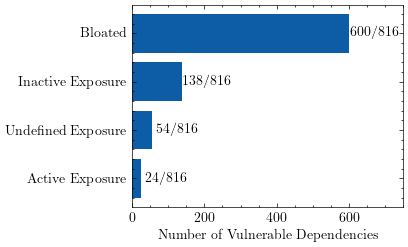

In [5]:
labels = ['Bloated', 'Inactive Exposure', 'Undefined Exposure', 'Active Exposure']
counts = [
    bloated_vulnerable_dependencies,
    inactive_exposures, 
    undefined_exposures,
    active_exposure]

total = sum(counts)  
fig, ax = plt.subplots()

# Create bars
bars = ax.barh(labels, counts)

# Annotations
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}/{total}', 
                xy=(width + 70, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                color='black')

ax.set_xlim(0, max(counts) + 150)  # Adjust x-axis limits to account for width/total display
ax.set_xlabel('Number of Vulnerable Dependencies')

plt.gca().invert_yaxis() 

plt.savefig("figures/rq2.pdf", bbox_inches='tight')
plt.show()